# **PyTorch Computer Vision**

**Workflow:**
 - **Computer Vision Libraries**
 - **Load Data**
 - **Prepare Data**
 - **Building Baseline Model**
 - **Prediction and Evaluation**

## **Computer Vision Libraries**

 - **`torchvision`**
 - **`torchvision.datasets`**
 - **`torchvision.models`**
 - **`torchvision.transforms`**
 - **`torch.utils.data.Dataset`**
 - **`torch.utils.data.DataLoader`**

In [ ]:
# Import PyTorch
import torch
from torch.utils.data import DataLoader
from torch import nn

# Import accuracy from torchmetrics
try:
    from torchmetrics import Accuracy
except:
    !pip install torchmetrics --quiet
    from torchmetrics import Accuracy

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")

In [ ]:
# Check versions
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.0.1+cu118
torchvision version: 0.15.2+cu118


## **Device Agnostic Setting**

In [ ]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## **Getting Dataset**

### **FashionMNIST Dataset**

In [ ]:
# Setup training data
train_data = datasets.FashionMNIST(
    root = "./fashion_mnist/", # Location for files download
    train = True, # Get training data
    download = True, # Download data if not exist on disk
    transform = ToTensor(), # Convert images to tensors
    target_transform = None
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root = "./fashion_mnist/",
    train = False,
    download = True,
    transform = ToTensor()
)

In [ ]:
# See first training sample
image, label = train_data[0]
print(f"Image Data:\n{image}\n\nImage Label:\n{label}")

Image Data:
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0

### **Input and Output Shape**

In [ ]:
# Print the shape of the image
image.shape

torch.Size([1, 28, 28])

**`torch.Size([1, 28, 28]) -> [color_channels, height, width]`**

In [ ]:
# Length of data
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [ ]:
# Print the class label names
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

### **Visualize Data**

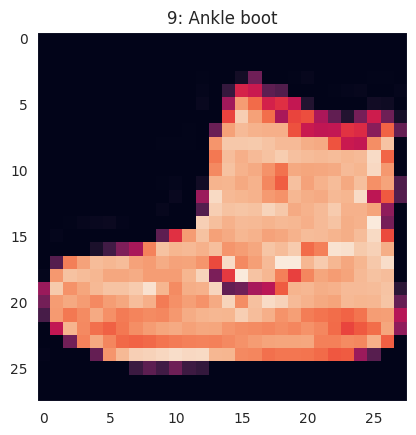

In [ ]:
# Show the sample image
plt.imshow(image.squeeze())
plt.title(f"{label}: {class_names[label]}")
plt.show()

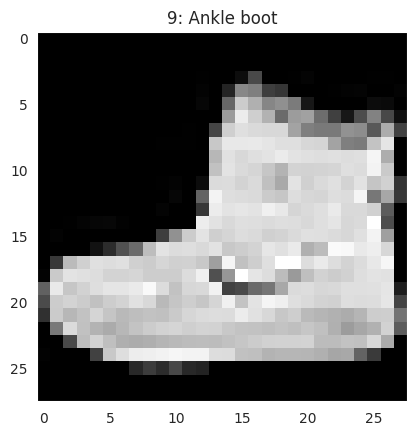

In [ ]:
# View the image in grayscale
plt.imshow(image.squeeze(), cmap = "gray")
plt.title(f"{label}: {class_names[label]}")
plt.show()

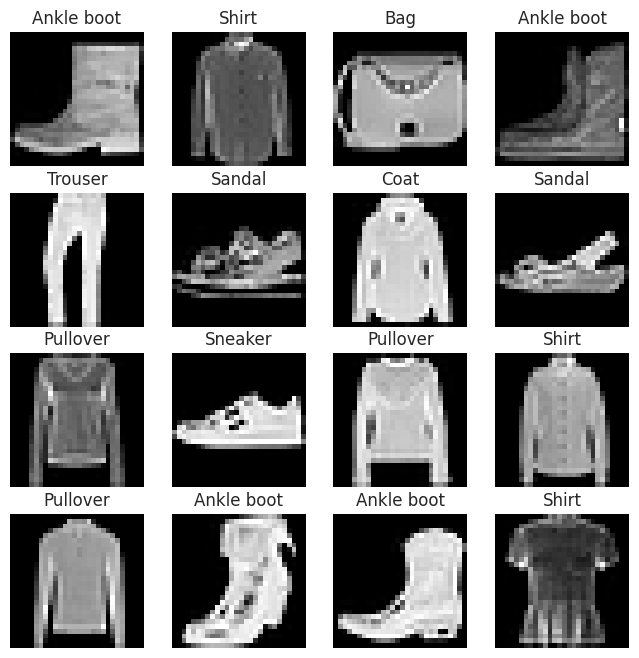

In [ ]:
# Set random seed
torch.manual_seed(42)

# Update figure size
fig = plt.figure(figsize = (8, 8))

# Number of required rows and cols
rows, cols = 4, 4

# Traverse to plot the images
for i in range(1, rows * cols + 1):
    # Generate a random index
    random_idx = torch.randint(0, len(train_data), size = [1]).item()

    # Get the image and label at the random index
    img, label = train_data[random_idx]

    # Create a subplot
    fig.add_subplot(rows, cols, i)

    # Plot the image
    plt.imshow(img.squeeze(), cmap="gray")

    # Add the tiltle
    plt.title(class_names[label])

    # Turn off the axis
    plt.axis(False)

# Plot the image
plt.show()

## **Prepare DataLoader**

In [ ]:
# Initialize batch size
BATCH_SIZE = 32

# Turn the datasets into iterable (batches)
train_dataloader = DataLoader(
    train_data,
    batch_size = BATCH_SIZE, # Set samples per batch
    shuffle = True # Shuffle data every epoch
)

test_dataloader = DataLoader(
    test_data,
    batch_size = BATCH_SIZE,
    shuffle = False
)

In [ ]:
# Print the length of the data
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [ ]:
# Get first batch from the train dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

## **Baseline Model Building**

### **Flatten Layer Function**

In [ ]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x)

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height * width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height * width]


### **Build Model**

In [ ]:
# Create a class for FashionMNIST classification
class FashionMNISTModel(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = input_shape, out_features = hidden_units),
            nn.Linear(in_features = hidden_units, out_features = output_shape),
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [ ]:
# Set random seed
torch.manual_seed(42)

# Initialize the model and move to device
fashion_mnist_model = FashionMNISTModel(
    input_shape = 784,
    hidden_units = 10,
    output_shape = len(class_names)
).to(device)

# View the model parameters
next(fashion_mnist_model.parameters()).device

device(type='cuda', index=0)

### **Loss, Optimizer and Evaluation Metrics**

In [ ]:
# Setup loss function, optimizer and evaluation metrics
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = fashion_mnist_model.parameters(), lr = 0.1)
accuracy_fn = Accuracy(task = "multiclass", num_classes = len(class_names)).to(device)

### **Training and Testing Loop**

In [ ]:
# Function for training step
def train_step(
    model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    optimizer: torch.optim.Optimizer,
    accuracy_fn,
    device: torch.device = device
):
    # Initialize train_loss and train_acc
    train_loss, train_acc = 0, 0

    # Move the model to device
    model.to(device)

    # Loop over the batches of training data
    for batch, (X, y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)

        # Forward pass
        y_pred = model(X)

        # Get the loss
        loss = loss_fn(y_pred, y)

        # Update the loss and accuracy
        train_loss += loss
        train_acc += accuracy_fn(y_pred.argmax(dim = 1), y)

        # Optimizer zero grad
        optimizer.zero_grad()

        # Backpropogate
        loss.backward()

        # Update optimizer
        optimizer.step()

    # Calculate the train loss and train acc per epoch
    train_loss = train_loss / len(data_loader)
    train_acc = train_acc / len(data_loader)

    # Print the details
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc * 100:.4f}% |", end = " ")

# Function for testing step
def test_step(
    model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    accuracy_fn,
    device: torch.device = device
):
    # Initialize test_loss and test_acc
    test_loss, test_acc = 0, 0

    # Move the model to device
    model.to(device)

    # Set model to evaluation mode
    model.eval()

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop over the batches of testing data
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)

            # Forward pass
            test_pred = model(X)

            # Get the loss
            test_loss = loss_fn(test_pred, y)

            # Update the loss and accuracy
            test_loss = test_loss + test_loss
            test_acc = test_acc + accuracy_fn(test_pred.argmax(dim = 1), y)

    # Calculate the test loss and test acc per epoch
    test_loss = test_loss / len(data_loader)
    test_acc = test_acc / len(data_loader)

    # Print the details
    print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc * 100:.4f}%")

### **Helper Functions**

In [ ]:
# Import timer
from timeit import default_timer as timer

# Function to calculate the time
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """

    # Calculate the total time
    total_time = end - start

    # Print the message
    print(f"Train time on {device}: {total_time:.3f} seconds")

    # Return the total time
    return total_time

In [ ]:
# Set random seed
torch.manual_seed(42)

# Function to evaluate the model
def eval_model(
    model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    accuracy_fn,
    device: torch.device = device
):
    """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """

    # Initialize loss and accuracy
    loss, acc = 0, 0

    # Set the model to eval mode
    model.eval()

    # Turn on inference context manager
    with torch.inference_mode():
        # Traverse over the batches and data
        for X, y in data_loader:
            # Move the data to device
            X, y = X.to(device), y.to(device)

            # Get the predictions
            y_pred = model(X)

            # Update the loss and accuracy
            loss = loss + loss_fn(y_pred, y)
            acc = acc + accuracy_fn(y, y_pred.argmax(dim = 1))

        # Calculate the loss per epoch
        loss = loss / len(data_loader)
        acc = acc / len(data_loader)

    return {
        "model_name": model.__class__.__name__,
        "model_loss": loss.item(),
        "model_acc": acc
    }

### **Run Training**

In [ ]:
# Set random seed
torch.manual_seed(42)

# Measure time for each epoch
train_time_start_on_gpu = timer()

# Initialize epochs
epochs = 10

# Loop for epochs
for epoch in range(epochs):
    # Print the epoch number
    print(f"Epoch: {epoch} |", end = " ")

    # Run training step
    train_step(
        fashion_mnist_model,
        train_dataloader,
        loss_fn,
        optimizer,
        accuracy_fn
    )

    # Run testing step
    test_step(
        fashion_mnist_model,
        test_dataloader,
        loss_fn,
        accuracy_fn
    )

# Record the end time
train_time_end_on_gpu = timer()

# Calculate the total train time
total_train_time = print_train_time(
    start = train_time_start_on_gpu,
    end = train_time_end_on_gpu,
    device = device
)

Epoch: 0 | Train loss: 0.59039 | Train accuracy: 79.1717% | Test loss: 0.00196 | Test accuracy: 82.0387%
Epoch: 1 | Train loss: 0.47633 | Train accuracy: 83.3200% | Test loss: 0.00176 | Test accuracy: 83.1969%
Epoch: 2 | Train loss: 0.45503 | Train accuracy: 84.0517% | Test loss: 0.00211 | Test accuracy: 83.4265%
Epoch: 3 | Train loss: 0.44251 | Train accuracy: 84.4733% | Test loss: 0.00235 | Test accuracy: 83.7460%
Epoch: 4 | Train loss: 0.43582 | Train accuracy: 84.7000% | Test loss: 0.00273 | Test accuracy: 83.2668%
Epoch: 5 | Train loss: 0.42915 | Train accuracy: 84.9717% | Test loss: 0.00188 | Test accuracy: 83.6362%
Epoch: 6 | Train loss: 0.42475 | Train accuracy: 85.2250% | Test loss: 0.00267 | Test accuracy: 83.3167%
Epoch: 7 | Train loss: 0.42265 | Train accuracy: 85.0583% | Test loss: 0.00196 | Test accuracy: 83.3766%
Epoch: 8 | Train loss: 0.42032 | Train accuracy: 85.2550% | Test loss: 0.00330 | Test accuracy: 83.4565%
Epoch: 9 | Train loss: 0.41754 | Train accuracy: 85.286

### **Evaluation**

In [ ]:
# Set random seed
torch.manual_seed(42)

# Evaluate the models
fashion_mnist_model_results = eval_model(
    model = fashion_mnist_model,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn
)

# Print the result
fashion_mnist_model_results

{'model_name': 'FashionMNISTModel',
 'model_loss': 0.46279823780059814,
 'model_acc': tensor(0.8365, device='cuda:0')}

## **Saving Model**

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount("./Drive", force_remount = True)

Mounted at ./Drive


In [ ]:
# Path to handle paths to files / folders
from pathlib import Path

# Create models directory
MODEL_PATH = Path("./Drive/MyDrive/PyTorch Course/models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

# Create model save path
MODEL_NAME = "03_pytorch_fashion_mnist_linear.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving Model to: {MODEL_SAVE_PATH}")
torch.save(obj = fashion_mnist_model.state_dict(), f = MODEL_SAVE_PATH)

Saving Model to: Drive/MyDrive/PyTorch Course/models/03_pytorch_fashion_mnist_linear.pth


In [ ]:
# Check the saved file path
!ls -l "./Drive/MyDrive/PyTorch Course/models/03_pytorch_fashion_mnist_linear.pth"

-rw------- 1 root root 33839 Jul 20 15:29 './Drive/MyDrive/PyTorch Course/models/03_pytorch_fashion_mnist_linear.pth'


## **Load Model**

### **Initialize Model**

In [ ]:
# Initialize the model and move to device
fashion_mnist_model_loaded = FashionMNISTModel(
    input_shape = 784,
    hidden_units = 10,
    output_shape = len(class_names)
).to(device)

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
fashion_mnist_model_loaded.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

<All keys matched successfully>

### **Generate Outputs**

In [ ]:
# Put the loaded model into evaluation mode
fashion_mnist_model_loaded.eval()

# Initialize a list to store predictions
all_predictions = []

# Turn on inference context manager
with torch.inference_mode():
    # Traverse over the batches and data
    for X, y in test_dataloader:
        # Move the data to device
        X, y = X.to(device), y.to(device)

        # Get the predictions
        y_pred = fashion_mnist_model_loaded(X).argmax(dim = 1)

        # Move the predictions back to the CPU (if using GPU)
        y_pred = y_pred.cpu()

        # Append the predictions to the list
        all_predictions.append(y_pred)

# Concatenate all predictions into a single tensor along the batch dimension
all_predictions = torch.cat(all_predictions, dim=0)

In [ ]:
# Import classification report
from sklearn.metrics import classification_report

# Print the classification report
print(classification_report(test_data.targets.to("cpu"), all_predictions.to("cpu")))

              precision    recall  f1-score   support

           0       0.82      0.77      0.80      1000
           1       0.94      0.97      0.96      1000
           2       0.72      0.74      0.73      1000
           3       0.88      0.80      0.84      1000
           4       0.68      0.83      0.74      1000
           5       0.95      0.91      0.93      1000
           6       0.62      0.52      0.56      1000
           7       0.92      0.92      0.92      1000
           8       0.93      0.95      0.94      1000
           9       0.92      0.96      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.83     10000
weighted avg       0.84      0.84      0.83     10000

